# Plot the wind direction during precipitation events
- from Eklima and the 
- minuetly observations

In [1]:
import numpy as np
import netCDF4
import pandas as pd

import sys
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/research_Haukeli/Python/windrose')
#sys.path.append('/Volumes/SANDISK128/Documents/Research_UiO_50/Python/windrose/')
from windrose import WindroseAxes
from matplotlib import colors
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/')
#sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import createFolder as cF
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
station = 'Haukeliseter'

In [3]:
savefig = 1
form = 'png'
figdir = '../../Figures/Weathermast_MEPS_Retrieval/%s/Windrose' %station

In [4]:
nc_dir = '../../Data/Weathermast_MEPS_Retrieval/'

In [5]:
m = ['11', '12', '01', '02', '03']

In [6]:
fn = dict()
obs_wind_dir = dict()
obs_wind_speed = dict()

meps_wind_dir = dict()
meps_wind_speed = dict()
for month in m:
    if month == '11':
#        t = np.arange(8,31)
        t = [9, 12, 13, 14, 15, 16, 17, 23, 24, 26,29,30]
    if month == '12': #or  or 
 #       t = np.arange(1,32)
        t = [7, 9, 10, 11, 12, 13, 15, 21, 22, 23, 24, 25, 26, 29, 30, 31]
    if month == '01':
        t = [2, 3, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 28, 29]
    if month == '02':
  #      t = np.arange(1,29)
        t = [2, 3, 4, 6]
    if month == '03':
        t = [9, 14, 16, 17, 19, 21, 24, 30, 31]
    if month == '11' or month == '12':
        year = '2016'
    if month == '01' or month == '02' or month == '03':
        year = '2017'
    
    for day in t:
        
        if day < 10:
            day = '0%s' %day
        else:
            day = '%s' %day
            
        Date = int(year+month+day)
        
        fn[Date] = netCDF4.Dataset(nc_dir+station+'/weathermast_meps_retrieval_%s.nc' %(Date), 'r')
        
        
        obs_wind_dir[Date] = fn[Date].variables['obs_wind_direction'][:]
        obs_wind_speed[Date] = fn[Date].variables['obs_wind_speed'][:]
        
        meps_wind_dir[Date] = fn[Date].variables['meps_wind_direction'][:]
        meps_wind_speed[Date] = fn[Date].variables['meps_wind_speed'][:]
        
        fn[Date].close()

In [7]:
obs_ws = (list(obs_wind_speed.values()))
obs_wd = (list(obs_wind_dir.values()))

In [8]:
meps_ws = (list(meps_wind_speed.values()))
meps_wd = (list(meps_wind_dir.values()))

meps_WS = np.array(meps_ws)[:,:,0]
meps_WD = np.array(meps_wd)[:,:,0]

In [9]:
obs_WD = np.empty(shape=(np.array(obs_wd).shape[0],np.array(obs_wd[0]).shape[0]))
obs_WD[:] =  np.nan

obs_WS = np.empty(shape=(np.array(obs_wd).shape[0],np.array(obs_wd[0]).shape[0]))
obs_WS[:] =  np.nan
for i in range(np.array(obs_wd).shape[0]):
 #   print(np.array(obs_wd[i]).shape)
    if np.array(obs_wd[i]).shape[0] == 24:
    #    print(np.array(obs_wd[i]).shape, i)
        for k in range(np.array(obs_wd[i]).shape[0]):
            obs_WD[i,k*60] = obs_wd[i][k]
            obs_WS[i,k*60] = obs_ws[i][k]
    else:
        obs_WD[i,:] = obs_wd[i][:]
        obs_WS[i,:] = obs_ws[i][:]

## Double fence

plot saved: ../../Figures/Weathermast_MEPS_Retrieval/Haukeliseter/Windrose/obs_wind_precip_events_2016_2017.png


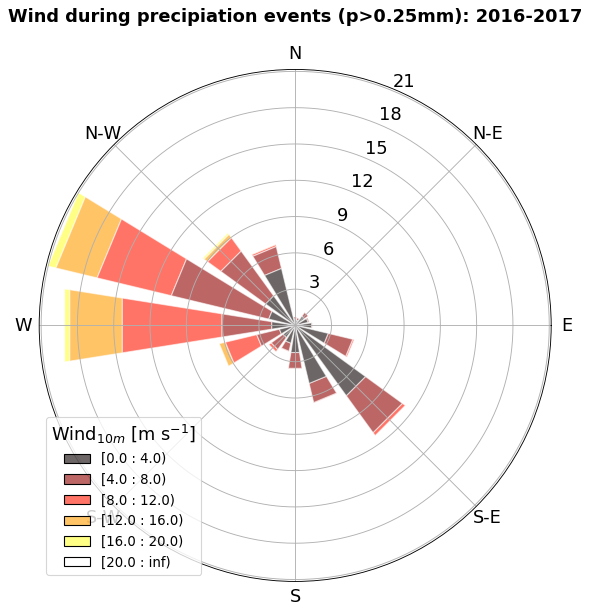

In [10]:
ax0 = WindroseAxes.from_ax()
ax0.bar(  obs_WD[~np.isnan(obs_WD[:,:])], obs_WS[~np.isnan(obs_WD[:,:])], 
      # normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4),alpha=0.5)
        normed=True, opening=0.8, edgecolor ='white',cmap=plt.get_cmap('hot'), bins = np.arange(0,24,4),alpha=0.6)
        

ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_yticks(np.arange(3, 24, step=3))
ax0.set_yticklabels(np.arange(3, 24, step=3))
ax0.set_title('Wind during precipiation events (p>0.25mm): 2016-2017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'obs_wind_precip_events_2016_2017.%s' %form
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: %s/%s' %(figdir,fig_name))

## MEPS

plot saved: ../../Figures/Weathermast_MEPS_Retrieval/Haukeliseter/Windrose/meps_wind_precip_events_2016_2017_EM0.png


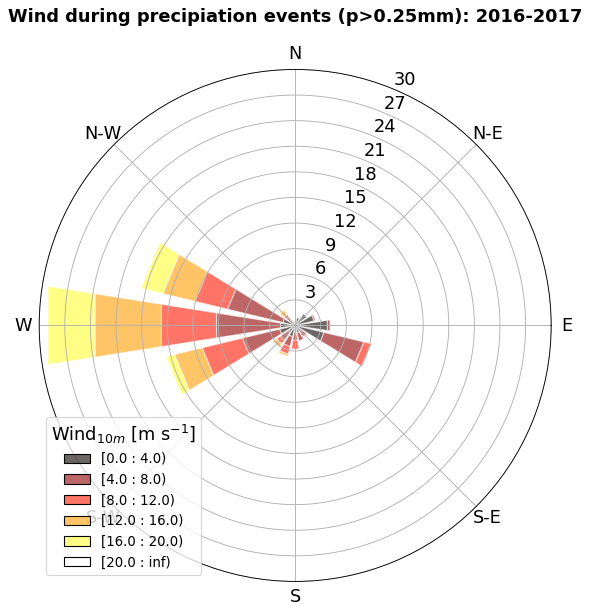

In [11]:
ax0 = WindroseAxes.from_ax()
ax0.bar(  meps_WD[~np.isnan(meps_WD[:,:])], meps_WS[~np.isnan(meps_WD[:,:])], 
      # normed=True, opening=0.8, edgecolor ='white',cmap=cmap, bins = np.arange(0,24,4),alpha=0.5)
        normed=True, opening=0.8, edgecolor ='white',cmap=plt.get_cmap('hot'), bins = np.arange(0,24,4),alpha=0.6)
        

ax0._info['bins']
ax0.set_legend()
ax0.legend(title = 'Wind$_{10m}$ [m s$^{-1}$]', fontsize = 12)
ax0.get_legend().get_title().set_fontsize(16)
ax0.tick_params(labelsize = 16)
ax0.set_yticks(np.arange(3, 33, step=3))
ax0.set_yticklabels(np.arange(3, 33, step=3))
ax0.set_title('Wind during precipiation events (p>0.25mm): 2016-2017', fontsize = 16, y=1.08,fontweight='bold')
if savefig == 1:
    fig_name = 'meps_wind_precip_events_2016_2017_EM0.%s' %form
    cF.createFolder('%s/' %(figdir))
    plt.savefig('%s/%s' % (figdir, fig_name), format = form, bbox_inches='tight', transparent=True)
    print('plot saved: %s/%s' %(figdir,fig_name))